# Build a sentiment analysis model for text data using the IMDB movie review dataset:
# 1.Preprocess the text data by tokenizing, padding, and truncating the sequences.
# 2.Build a model using an Embedding layer followed by an LSTM layer and fully connected layers for binary classification.
# 3.Train the model for 10 epochs, validate it on a validation set, and evaluate its accuracy and F1-score on the test set.
# 4.Plot the training and validation loss curves.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# 1. Preprocess the data
vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 2. Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
# 3. Train and evaluate the model

from sklearn.metrics import accuracy_score, f1_score
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 458ms/step - accuracy: 0.6772 - loss: 0.5762 - val_accuracy: 0.8556 - val_loss: 0.3679
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 168s 537ms/step - accuracy: 0.8912 - loss: 0.2720 - val_accuracy: 0.8678 - val_loss: 0.3239
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 192s 507ms/step - accuracy: 0.9282 - loss: 0.1886 - val_accuracy: 0.8578 - val_loss: 0.3351
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 189s 466ms/step - accuracy: 0.9471 - loss: 0.1496 - val_accuracy: 0.8618 - val_loss: 0.4044
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 200s 459ms/step - accuracy: 0.9670 - loss: 0.0931 - val_accuracy: 0.8558 - val_loss: 0.4297
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 212s 492ms/step - accuracy: 0.9788 - loss: 0.0672 - val_accuracy: 0.8554 - val_loss: 0.5348
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 193s 462ms/step - accuracy: 0.9786 - loss: 0.0721 - val_accuracy: 0.8474 - val_loss: 0.4978
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 460ms/step - accuracy: 0.9884 -

In [6]:
print("Accuracy:", accuracy)
print("F1-score:", f1)

Accuracy: 0.84772
F1-score: 0.8494959478157739


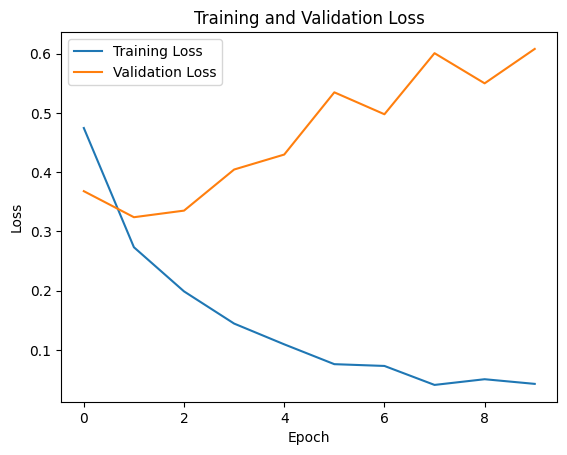

In [5]:
# 4. Plot the loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()